<a href="https://colab.research.google.com/github/18520395/CS114.K21/blob/master/snakeclassification/snake2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
from keras.preprocessing.image import load_img
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array

In [ ]:
!unzip '/content/drive/My Drive/Dataset/snake.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: snake/non-venomous/indian-rock-python-with-a-full-belly-in-a-stream-in-ranthambhore-tiger-D2H4CR.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python_001.jpg  
  inflating: snake/non-venomous/indian-rock-python_002.jpg  
  inflating: snake/non-venomous/indian-rock-python_003.jpg  
  inflating: snake/non-venomous/indian-rock-python_1030440_DH.jpg  
  inflating: snake/non-venomous/indianratsnake.jpg  
  inflating: snake/non-venomous/indianrockpython.jpg  
  inflating: snake/non-venomous/indianrockpython_001.jpg  
  inflating: snake/non-venomous/indian_python_2011.jpg  
  inflating: snake/non-venomous/indian_rockey_python.jpg  
  inflating: snake/non-venomous/Indian_rock_python.jpg  
  inflating: snake/non-venomous/Indian_rock_python_(Python_molurus)_at_mysore_zoo.jpg  
  inflating: snake/non-venomous/Indian_Rock_Python_(_P_molurus)_rolled_up_into_a_ball.JPG  

In [ ]:
# Lấy đường dẫn đến từng ảnh
image_path = list(paths.list_images('/content/snake'))

In [ ]:
# Các class có trong dataset
label = os.listdir('/content/snake/')
label

['non-venomous', 'venomous']

In [ ]:
# Tạo list chứa các đường dẫn đến ảnh của mỗi class
venomous_imgs = []
non_venomous_imgs = []

for i in os.listdir('/content/snake/venomous/'):
      venomous_imgs.append('/content/snake/venomous/'+i)
for i in os.listdir('/content/snake/non-venomous/'):
      non_venomous_imgs.append('/content/snake/non-venomous/'+i)

In [ ]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Load ảnh và resize về đúng kích thước mà VGG 16 cần là (224,224)
list_image = []

for imgpath in venomous_imgs:
    #load ảnh về size 224, 224 để phù hợp với đầu vào của VGG16
    image = load_img(imgpath, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, 0)
    list_image.append(image)

for imgpath in non_venomous_imgs:
    image = load_img(imgpath, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, 0)
    list_image.append(image)

list_image = np.vstack(list_image)

In [ ]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(list_image)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*7*7))

In [ ]:
labels = np.hstack((np.ones(len(venomous_imgs)), np.zeros(len(non_venomous_imgs))))

In [ ]:
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Sử dụng Support Vector Machines để train model
svc = LinearSVC()

t=time.time()
svc = svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Support Vector Machines...')
# Check the score of the Support Vector Machines
print('Accuracy Support Vector Machines = ', round(svc.score(X_test, y_test), 4))

# Prediction 
y_pred= svc.predict(X_test)
print(classification_report(y_test, y_pred))

15.08 Seconds to train Support Vector Machines...
Accuracy Support Vector Machines =  0.8147
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       838
         1.0       0.82      0.83      0.83       943

    accuracy                           0.81      1781
   macro avg       0.81      0.81      0.81      1781
weighted avg       0.81      0.81      0.81      1781



In [ ]:
# Sử dụng Logistic Regression để train model
lr = LogisticRegression()

t=time.time()
lr = lr.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Logistic Regression...')
# Check the score of the Logistic Regression
print('Accuracy Logistic Regression = ', round(lr.score(X_test, y_test), 4))

# Prediction 
y_pred= lr.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


13.33 Seconds to train Logistic Regression...
Accuracy Logistic Regression =  0.8338
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       838
         1.0       0.85      0.84      0.84       943

    accuracy                           0.83      1781
   macro avg       0.83      0.83      0.83      1781
weighted avg       0.83      0.83      0.83      1781



In [ ]:
# Sử dụng Random Forest Classifier để train model
rfc = RandomForestClassifier()

t=time.time()
rfc = rfc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train Random Forest Classifier...')
# Check the score of the Random Forest Classifier
print('Accuracy Random Forest Classifier = ', round(rfc.score(X_test, y_test), 4))

# Prediction 
y_pred= rfc.predict(X_test)
print(classification_report(y_test, y_pred))

36.87 Seconds to train Random Forest Classifier...
Accuracy Random Forest Classifier =  0.8046
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       838
         1.0       0.82      0.81      0.81       943

    accuracy                           0.80      1781
   macro avg       0.80      0.80      0.80      1781
weighted avg       0.80      0.80      0.80      1781



Saving ho_mang_chua_doc.jpg to ho_mang_chua_doc.jpg
Saving ran_bongsung_khongdoc.jpg to ran_bongsung_khongdoc.jpg
Saving ran_cap_nia_doc.jpg to ran_cap_nia_doc.jpg
Saving ran_cap_nia_doc1.jpg to ran_cap_nia_doc1.jpg
Saving ran_cap_nong_doc.jpg to ran_cap_nong_doc.jpg
Saving ran_cap_nong_doc1.jpg to ran_cap_nong_doc1.jpg
Saving ran_ho_dat_doc.jpg to ran_ho_dat_doc.jpg
Saving ran_ho_mang_doc.jpg to ran_ho_mang_doc.jpg
Saving ran_ho_trau_khongdoc.jpg to ran_ho_trau_khongdoc.jpg
Saving ran_nuoc_khongdoc.jpg to ran_nuoc_khongdoc.jpg
Saving ran_nuoc_khongdoc_1.jpg to ran_nuoc_khongdoc_1.jpg
Saving ran_nuoc_khongdoc_2.jpg to ran_nuoc_khongdoc_2.jpg
Saving ran_rao_khongdoc.jpg to ran_rao_khongdoc.jpg
Saving ran_ri_voi_khongdoc.jpg to ran_ri_voi_khongdoc.jpg
Image 1 :
Name of image: ho_mang_chua_doc.jpg


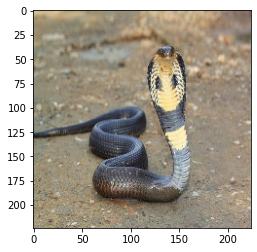

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 2 :
Name of image: ran_bongsung_khongdoc.jpg


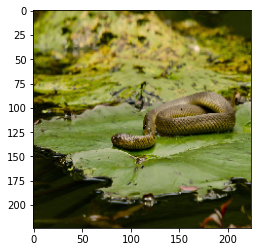

Support vector machine result: Không có độc
Logistic Regression: Không có độc
Random Forest Classifier: Không có độc
--------------------
Image 3 :
Name of image: ran_cap_nia_doc.jpg


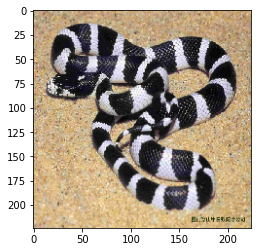

Support vector machine result: Không có độc
Logistic Regression: Không có độc
Random Forest Classifier: Có độc
--------------------
Image 4 :
Name of image: ran_cap_nia_doc1.jpg


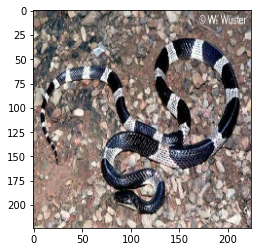

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 5 :
Name of image: ran_cap_nong_doc.jpg


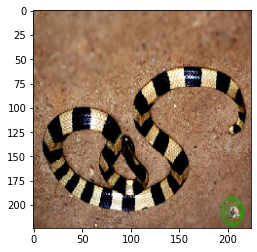

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 6 :
Name of image: ran_cap_nong_doc1.jpg


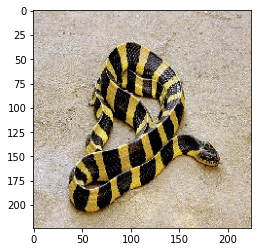

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 7 :
Name of image: ran_ho_dat_doc.jpg


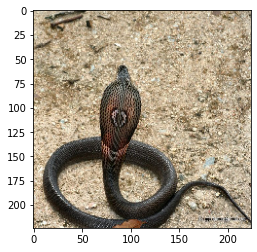

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 8 :
Name of image: ran_ho_mang_doc.jpg


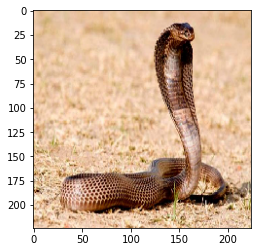

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Có độc
--------------------
Image 9 :
Name of image: ran_ho_trau_khongdoc.jpg


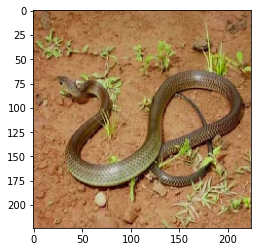

Support vector machine result: Không có độc
Logistic Regression: Không có độc
Random Forest Classifier: Có độc
--------------------
Image 10 :
Name of image: ran_nuoc_khongdoc.jpg


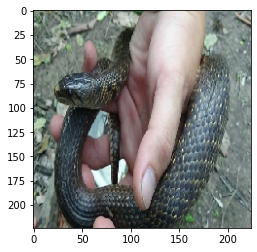

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Không có độc
--------------------
Image 11 :
Name of image: ran_nuoc_khongdoc_1.jpg


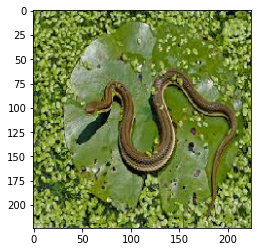

Support vector machine result: Không có độc
Logistic Regression: Không có độc
Random Forest Classifier: Không có độc
--------------------
Image 12 :
Name of image: ran_nuoc_khongdoc_2.jpg


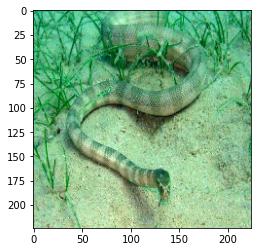

Support vector machine result: Có độc
Logistic Regression: Có độc
Random Forest Classifier: Không có độc
--------------------
Image 13 :
Name of image: ran_rao_khongdoc.jpg


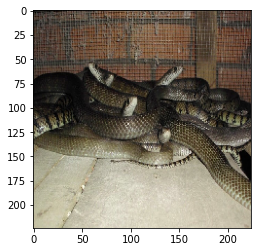

Support vector machine result: Không có độc
Logistic Regression: Không có độc
Random Forest Classifier: Không có độc
--------------------
Image 14 :
Name of image: ran_ri_voi_khongdoc.jpg


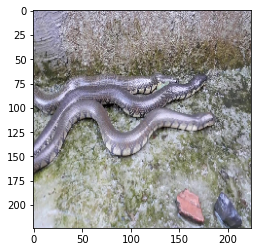

Support vector machine result: Không có độc
Logistic Regression: Không có độc
Random Forest Classifier: Không có độc
--------------------


In [ ]:
from google.colab import files
uploaded = files.upload()
list_upload = []
for (i, fn) in enumerate(uploaded.keys()):
  print("Image", i+1, ":")
  print("Name of image:", fn)
  path = '/content/' + fn 
  image = load_img(path, target_size=(224, 224))
  plt.imshow(image)
  plt.show()
  image = img_to_array(image)
  image = np.expand_dims(image, 0)
  image = np.vstack([image])
  features = model.predict(image)
  features = features.reshape((features.shape[0], 512*7*7))
  svc_result = svc.predict(features)
  lr_result = lr.predict(features)
  rfc_result = rfc.predict(features)
  print('Support vector machine result: ', end ='')
  if svc_result[0] == 0:
    print('Không có độc')
  else: print('Có độc')
  print('Logistic Regression: ', end = '')
  if lr_result[0] == 0:
    print('Không có độc')
  else: print('Có độc')
  print('Random Forest Classifier: ', end = '')
  if rfc_result[0] == 0:
    print('Không có độc')
  else: print('Có độc')
  print('--------------------')